<a href="https://colab.research.google.com/github/lucianomattar/Arcevo-R/blob/main/Trabalho_pr%C3%A1tico_1_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np #importa biblioteca para manipulação de matrizes
from matplotlib import pyplot as plt #importa bilbioteca para criação de gráficos
import tensorflow as tf
from tensorflow import keras
from tensorflow.image import resize

#início das importações de classes do Keras (modelos de Deep Learning)
from keras.datasets import fashion_mnist  
from keras.models import Sequential       
from keras.layers import Dense, InputLayer            
from keras.layers import Dropout          
from keras.utils import np_utils          


In [2]:
# importa o dataset Mnist da biblioteca do Keras
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()



4431872/4422102 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


(60000, 28, 28)


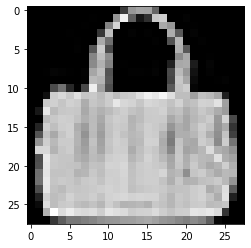

8


In [4]:
# imprime o tamanho do vetor
print(X_train.shape) 
first_imagem = X_train[4000]
# realiza a manipulação dos dados da imagem
first_imagem = np.array(first_imagem, dtype = 'float')
pixels = first_imagem.reshape((28,28))
# exibe a imagem do vetor
plt.imshow(pixels, cmap='gray')
plt.show()

# imprime a classe da imagem de treino do índice 100
print(y_train[4000])


(10000, 28, 28)


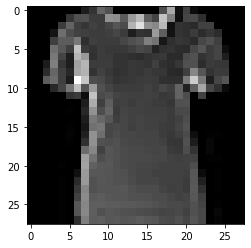

In [5]:
# imprime o tamanho do vetor
print(X_test.shape) 
first_imagem = X_test[4000]
# realiza a manipulação dos dados da imagem
first_imagem = np.array(first_imagem, dtype = 'float')
pixels = first_imagem.reshape((28,28))
# exibe a imagem do vetor
plt.imshow(pixels, cmap='gray')
plt.show()

# imprime a classe da imagem de test
#print(X_test[4000])

In [6]:
X_train.shape[1] * X_train.shape[2]

784

In [7]:
 
# Adiciona eixo no último índice da lista 
X_train_1 = np.expand_dims(X_train, axis=-1) 
# Repete 3 vezes o último índice 
X_train_1 = np.repeat(X_train_1, 3, axis=-1) 
# Redimensiona as imagens para 32x32 
X_train_resize = resize(X_train_1, [32,32])

In [8]:
num_pixels= X_train_resize.shape[1] * X_train_resize.shape[2]
print(num_pixels)

1024


In [10]:
from keras.applications.vgg16 import VGG16
model = VGG16(input_shape=(32,32,3), weights=None, classes = 10)
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [11]:
# Parte 2

In [12]:
#importa o dataset Mnist da biblioteca do Keras
(X_train_new, y_train_new), (X_test_new, y_test_new) = fashion_mnist.load_data() 

In [13]:
#calcula o total de pixels da imagem
num_pixels_2 = X_train_new.shape[1] * X_train_new.shape[2]  
print(num_pixels_2)

#tranforma os valores dos pixels para float32
X_train2 = X_train_new.reshape(X_train_new.shape[0], num_pixels_2).astype('float32')
X_test2 = X_test_new.reshape(X_test_new.shape[0], num_pixels_2).astype('float32')

#normalizando os valores dos pixels entre 0 e 1
X_train2 = X_train2 / 255
X_test2 = X_test2 / 255

784


In [14]:
#trasnforma os y em one-hot vector
y_train_h = np_utils.to_categorical(y_train_new)
y_test_h = np_utils.to_categorical(y_test_new)

#obtém o número de classes do problema
num_classes = y_test_h.shape[1]

print("Número de classes: ", num_classes)
print(y_train_h[4000])

Número de classes:  10
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [15]:
model = keras.Sequential([
                          keras.layers.Dense(num_pixels_2, input_dim = num_pixels_2, kernel_initializer='normal', activation='relu'),
                          keras.layers.Dense(1024,  kernel_initializer='normal', activation='relu'),
                          keras.layers.Dense(2048,  kernel_initializer='normal', activation='relu'),
                          keras.layers.Dense(2048,  kernel_initializer='normal', activation='relu'),
                          keras.layers.Dense(num_classes, kernel_initializer='normal', activation='softmax')
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 784)               615440    
                                                                 
 dense_1 (Dense)             (None, 1024)              803840    
                                                                 
 dense_2 (Dense)             (None, 2048)              2099200   
                                                                 
 dense_3 (Dense)             (None, 2048)              4196352   
                                                                 
 dense_4 (Dense)             (None, 10)                20490     
                                                                 
Total params: 7,735,322
Trainable params: 7,735,322
Non-trainable params: 0
_________________________________________________________________


In [17]:
# compila o modelo criado
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
# treina o modelo
result = model.fit(X_train2, y_train_h, validation_data = (X_test2, y_test_h), epochs=10, verbose=1, batch_size=100)

Epoch 1/10
600/600 [==============================] - 6s 5ms/step - loss: 0.5349 - accuracy: 0.8255 - val_loss: 0.4292 - val_accuracy: 0.8473
Epoch 2/10
600/600 [==============================] - 3s 5ms/step - loss: 0.3605 - accuracy: 0.8687 - val_loss: 0.3628 - val_accuracy: 0.8712
Epoch 3/10
600/600 [==============================] - 3s 5ms/step - loss: 0.3227 - accuracy: 0.8798 - val_loss: 0.3670 - val_accuracy: 0.8711
Epoch 4/10
600/600 [==============================] - 3s 5ms/step - loss: 0.3057 - accuracy: 0.8854 - val_loss: 0.3605 - val_accuracy: 0.8691
Epoch 5/10
600/600 [==============================] - 3s 5ms/step - loss: 0.2867 - accuracy: 0.8946 - val_loss: 0.3677 - val_accuracy: 0.8734
Epoch 6/10
600/600 [==============================] - 3s 5ms/step - loss: 0.2732 - accuracy: 0.8967 - val_loss: 0.3525 - val_accuracy: 0.8780
Epoch 7/10
600/600 [==============================] - 3s 5ms/step - loss: 0.2620 - accuracy: 0.9024 - val_loss: 0.3507 - val_accuracy: 0.8779
Epoch 

In [ ]:
model2 = keras.Sequential([
                          keras.layers.Dense(num_pixels_2, input_dim = num_pixels_2, kernel_initializer='normal', activation='relu'),
                          keras.layers.Dense(1024,  kernel_initializer='normal', activation='relu'),
                          keras.layers.Dense(2048,  kernel_initializer='normal', activation='relu'),
                          keras.layers.Dense(2048,  kernel_initializer='normal', activation='relu'),
                          keras.layers.Dense(num_classes, kernel_initializer='normal', activation='relu')
])

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 784)               615440    
                                                                 
 dense_6 (Dense)             (None, 1024)              803840    
                                                                 
 dense_7 (Dense)             (None, 2048)              2099200   
                                                                 
 dense_8 (Dense)             (None, 2048)              4196352   
                                                                 
 dense_9 (Dense)             (None, 10)                20490     
                                                                 
Total params: 7,735,322
Trainable params: 7,735,322
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compila o modelo criado
model2.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
# treina o modelo
result = model2.fit(X_train2, y_train_h, validation_data = (X_test2, y_test_h), epochs=10, verbose=1, batch_size=100)

Epoch 1/10
600/600 [==============================] - 3s 5ms/step - loss: nan - accuracy: 0.3201 - val_loss: 7.0996 - val_accuracy: 0.3242
Epoch 2/10
600/600 [==============================] - 3s 5ms/step - loss: nan - accuracy: 0.3161 - val_loss: 7.1014 - val_accuracy: 0.4172
Epoch 3/10
600/600 [==============================] - 3s 5ms/step - loss: 7.0316 - accuracy: 0.4063 - val_loss: 7.0638 - val_accuracy: 0.3604
Epoch 4/10
600/600 [==============================] - 3s 5ms/step - loss: nan - accuracy: 0.3986 - val_loss: 6.9879 - val_accuracy: 0.4390
Epoch 5/10
600/600 [==============================] - 3s 4ms/step - loss: 7.0276 - accuracy: 0.4015 - val_loss: 7.0459 - val_accuracy: 0.4465
Epoch 6/10
600/600 [==============================] - 3s 5ms/step - loss: 6.9083 - accuracy: 0.4524 - val_loss: 6.9067 - val_accuracy: 0.4590
Epoch 7/10
600/600 [==============================] - 3s 5ms/step - loss: 6.9757 - accuracy: 0.4033 - val_loss: 6.9323 - val_accuracy: 0.4397
Epoch 8/10
600/